In [92]:
from collections import defaultdict
import numpy as np
from gensim.models import Word2Vec, KeyedVectors
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [107]:
num_clusters = 10
num_seed_words = 30
num_plot = 10

In [43]:
# load specific word embeddings that you want 
w2v_model = Word2Vec.load('../wv/w2v_comment_raw.model')
w2v = w2v_model.wv.vectors
n_words = len(w2v)

In [54]:
kmeans = KMeans(n_clusters=num_clusters, n_jobs=-1, random_state=0)
cluster_idx = kmeans.fit_predict(w2v)
X_dist = kmeans.transform(w2v)**2   # [N, n_clusters]
X_dist_cluster = X_dist[range(n_words), cluster_idx]

E:\Anaconda3\envs\nlp\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


In [66]:
print(cluster_idx)
print(X_dist[:5])
print(X_dist_cluster[:5])
print((cluster_idx == kmeans.labels_).all())

[5 5 5 ... 5 5 5]
[[1.4341167  3.5339904  1.4280477  3.846999   4.0210752  0.8441634
  1.4447522  1.5897739  2.1349347  4.629287  ]
 [0.9607247  2.6968784  1.0356632  2.7624676  3.1010318  0.12012639
  0.9622768  0.9468198  1.5586201  3.5487807 ]
 [0.95674735 2.6917043  1.0297554  2.76069    3.1006513  0.11910124
  0.9599919  0.9471722  1.5553211  3.5414865 ]
 [0.95726585 2.703055   1.0341624  2.7660143  3.1073294  0.11905449
  0.9631096  0.95103365 1.5574565  3.5536273 ]
 [3.8627014  5.7591386  3.3792198  5.8953204  6.2086887  3.2129521
  3.49832    3.82319    4.119653   6.537099  ]]
[0.8441634  0.12012639 0.11910124 0.11905449 3.2129521 ]
True


In [8]:
print(kmeans.cluster_centers_)

[[ 0.06437363  0.09435159 -0.01916265 ... -0.07766025  0.00144754
   0.0277087 ]
 [ 0.05019812  0.16466627 -0.09795648 ... -0.03546993  0.20107436
   0.10626119]
 [-0.01994246  0.06872304  0.00655794 ... -0.07535367  0.06445178
   0.04315097]
 ...
 [ 0.02963244  0.03195391  0.00371041 ... -0.02754795  0.08338884
  -0.02472882]
 [ 0.14137635  0.02729364  0.03150054 ... -0.07459288  0.00775617
   0.12035169]
 [-0.09189375  0.11895908  0.03669512 ...  0.0705414   0.23696369
   0.04306204]]


In [64]:
word_cluster_list = list(zip(w2v_model.wv.index2word, cluster_idx, X_dist_cluster))
# each tuple: (word string, cluster, distance to its cluster centroid)
# word_cluster_list_sort = sorted(word_cluster_list, key=lambda el:el[1], reverse=False)
print(word_cluster_list[:10])

[('the', 5, 0.8441634), ('to', 5, 0.12012639), ('and', 5, 0.11910124), ('of', 5, 0.11905449), ('is', 5, 3.2129521), ('a', 5, 0.11834712), ('that', 5, 1.297926), ('in', 5, 1.4667103), ('i', 3, 3.403304), ('it', 5, 1.9699647)]


In [90]:
cluster_word_dict = defaultdict(list)
# each cluster is a list, storing corresponding words
for word in word_cluster_list:
    cluster_word_dict[word[1]].append(word)

cluster_word_dict_sorted = defaultdict(list)
for c in sorted(cluster_word_dict.keys()):
    # in each cluster, sort the words with their euclidean distance to the centroid
    cluster_word_dict_sorted[c] = [t[0] for t in sorted(cluster_word_dict[c], key=lambda el:el[2], reverse=False)]
    print(c, cluster_word_dict_sorted[c][:num_seed_words], '\n')

0 ['just', 'clorox', 'nilly', 'nellie', 'poision', 'even', 'hershey', 'dewey', 'so', 'putin', 'dunkin', 'frankenstein', 'like', 'probably', 'anyway', 'humanure', 'them', 'way', 'still', 'maybe', 'suvs', 'greco', 'mumbo', 'again', 'kind', 'back', 'tast', 'might', 'little', 'nile'] 

1 ['manuring', 'monocropping', 'weedicides', 'aronia', 'superweed', 'biofortified', 'polyculture', 'phytophthora', 'neonicotinoid', 'monocrop', 'thuringiensis', 'drosophila', 'herbicidal', 'lacewings', 'interspecific', 'aurochs', 'unfertilized', 'beneficials', 'fertigation', 'moringa', 'frankenfish', 'aquaponic', 'varities', 'hydroponically', 'agrichemicals', 'rabbits', 'flora', 'superphosphate', 'agroecology', 'agricultural'] 

2 ['do', 'adding', 'called', 'means', 'present', 'given', 'there', 'meant', 'see', 'says', 'added', 'regards', 'besides', 'help', 'make', 'use', 'unlike', 'regard', 'suggesting', 'using', 'used', 'referring', 'allow', 'noting', 'put', 'result', 'brought', 'known', 'explained', 'makin

In [94]:
tsne = TSNE(n_components=2, init='pca', verbose=1)
vocab_emb = tsne.fit_transform(w2v)
print(vocab_emb.shape)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19160 samples in 0.007s...
[t-SNE] Computed neighbors for 19160 samples in 11.759s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19160
[t-SNE] Computed conditional probabilities for sample 2000 / 19160
[t-SNE] Computed conditional probabilities for sample 3000 / 19160
[t-SNE] Computed conditional probabilities for sample 4000 / 19160
[t-SNE] Computed conditional probabilities for sample 5000 / 19160
[t-SNE] Computed conditional probabilities for sample 6000 / 19160
[t-SNE] Computed conditional probabilities for sample 7000 / 19160
[t-SNE] Computed conditional probabilities for sample 8000 / 19160
[t-SNE] Computed conditional probabilities for sample 9000 / 19160
[t-SNE] Computed conditional probabilities for sample 10000 / 19160
[t-SNE] Computed conditional probabilities for sample 11000 / 19160
[t-SNE] Computed conditional probabilities for sample 12000 / 19160
[t-SNE] Computed conditional probabilities for sa

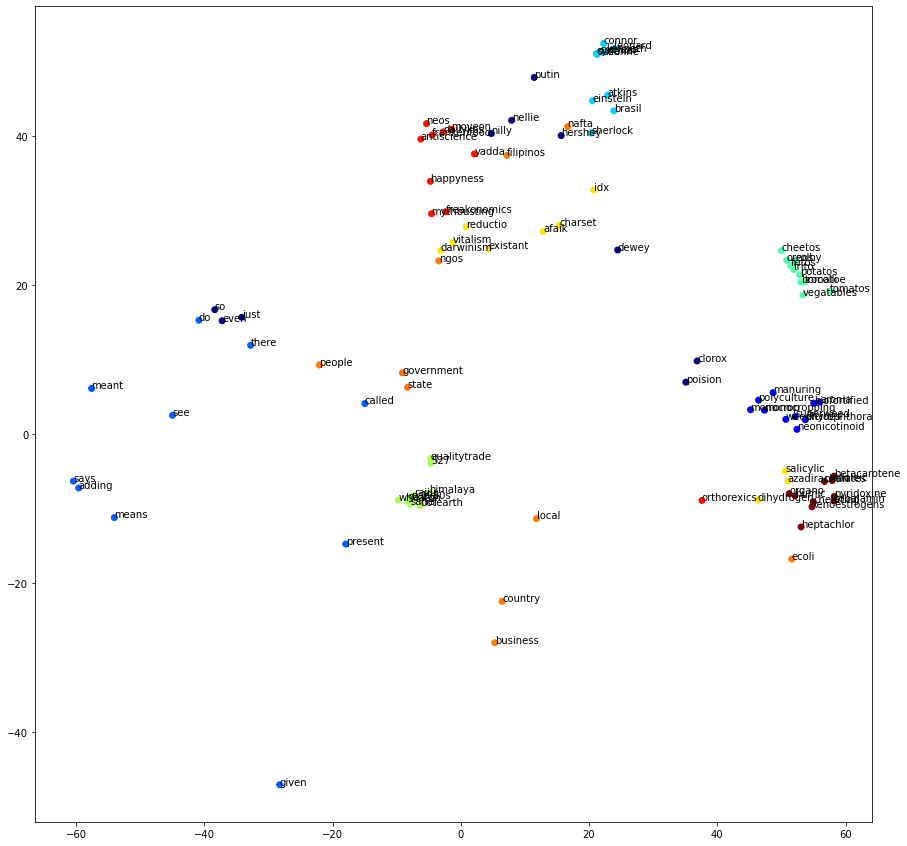

In [122]:
# word2index = {token: token_idx for token_idx, token in enumerate(w2v_model.wv.index2word)}
plt.figure(figsize=(15,15))
word_idx = []
for i, c in enumerate(cluster_word_dict_sorted.keys()):
    # word_idx = []
    draw_words = cluster_word_dict_sorted[c][:num_plot]
    for word in draw_words:
        idx = w2v_model.wv.vocab[word].index
        word_idx.append(idx)
        # plt.scatter(vocab_emb[idx, 0], vocab_emb[idx, 1], c=colors[i], cmap='jet')
        plt.annotate(word, xy=(vocab_emb[idx, 0], vocab_emb[idx, 1]))
        # plt.text(vocab_emb[idx, 0], vocab_emb[idx, 1], word)
    # print(word_idx)
    # print(draw_words)
    # plt.scatter(vocab_emb[word_idx, 0], vocab_emb[word_idx, 1], c=[i]*num_plot, cmap='jet')
colors = []
for i in range(num_clusters):
    colors += [i] * num_plot
plt.scatter(vocab_emb[word_idx, 0], vocab_emb[word_idx, 1], c=colors, cmap='jet')
plt.show()